# 1. Using self-driving dataset.

In [1]:
!pip install opencv-python-headless

In [2]:
import os
import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 99946, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 99946 (delta 44), reused 28 (delta 28), pack-reused 99887 (from 2)
Receiving objects: 100% (99946/99946), 625.38 MiB | 24.28 MiB/s, done.
Resolving deltas: 100% (71981/71981), done.


In [4]:
#Works for linux os
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
multiprocess 0.70.15 requires dill>=0.3.7, but you have dill 0.3.1.1 which is incompatible.
grpcio-status 1.71.0 requires grpcio>=1.71.0, but you have grpcio 1.65.5 which is incompatible.


In [5]:
!pip install tensorflow

In [6]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf-models-official, tf_keras


In [7]:
from object_detection.utils import visualization_utils as viz_utils

In [8]:
import tensorflow as tf

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!unzip '/content/drive/MyDrive/Colab Notebooks/object_detection/self_diving_zip/self_driving_dataset.zip'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: images/1479502279230178611.jpg  
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: 

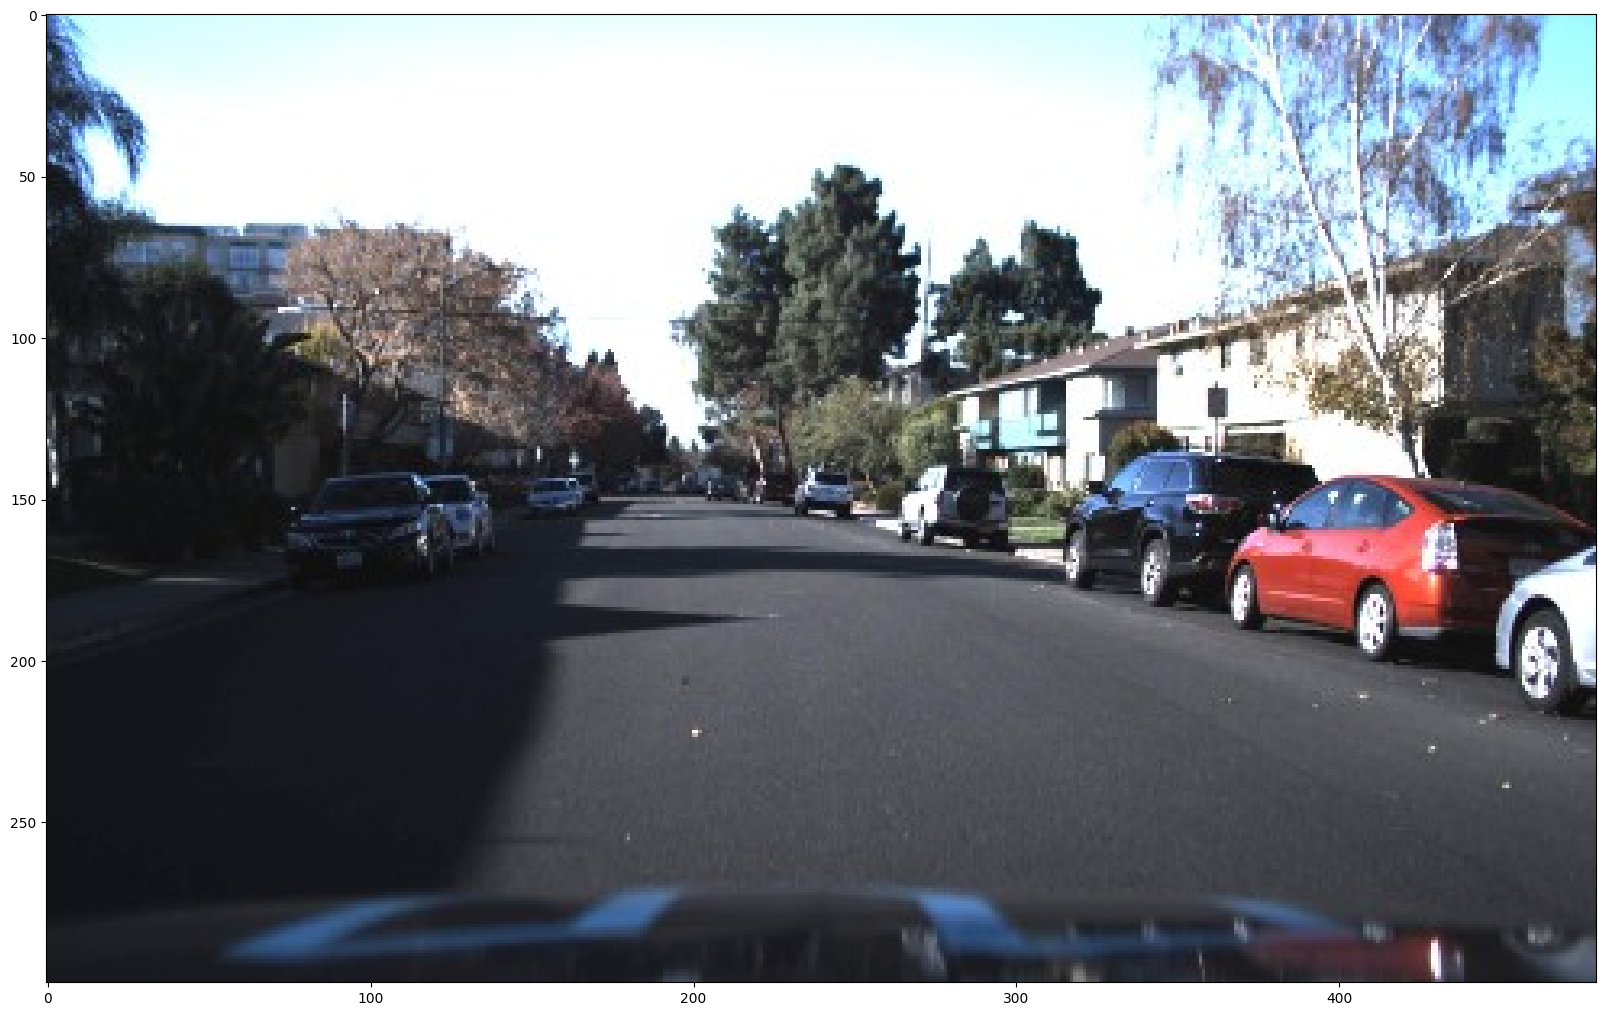

In [11]:
%matplotlib inline
plt.figure(figsize=(20,20))
img = cv2.imread('images/1479506173994033498.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 2. Using object detection dataset: visualiazing dataset.

In [14]:
# Uninstall and reinstall pandas and numpy
!pip uninstall pandas numpy -y
!pip install pandas numpy

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 70.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-model-optimization 0.8.0 requires numpy~=1.23, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompat

In [15]:
df = pd.read_csv('labels_train.csv')
df

frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]

In [16]:
print(img.shape)

(300, 480, 3)


In [21]:
y_dim, x_dim, c_dim = img.shape
print(y_dim, x_dim, c_dim)
gt_boxes={}
for index, row in df.iterrows():
  #Bbox if its person
  if row['class_id'] == 3:
    #bbox dimensions
    bbox = np.array([[row['ymin']/y_dim, row['xmin']/x_dim, row['ymax']/y_dim, row['xmax']/x_dim]], dtype=np.float32)
    #If imagen is in gt_boxes
    if row['frame'] in gt_boxes:
      #There's multiple boxes
      gt_boxes[row['frame']] = np.append(gt_boxes[row['frame']], np.array(bbox), axis=0)
    else:
      gt_boxes[row['frame']] = np.array(bbox)

300 480 3


In [22]:
my_path = 'images/'
train_images_np = []

for image in gt_boxes.keys():
  im = cv2.imread(my_path + image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_images_np.append(im)

In [24]:
pedestrain_class_id = 1
num_classes = 1

category_index = {
    num_classes: {
        'id': pedestrain_class_id,
        'name': 'pedestrian'
    }
}

# 3. Using object detection dataset: final visualization

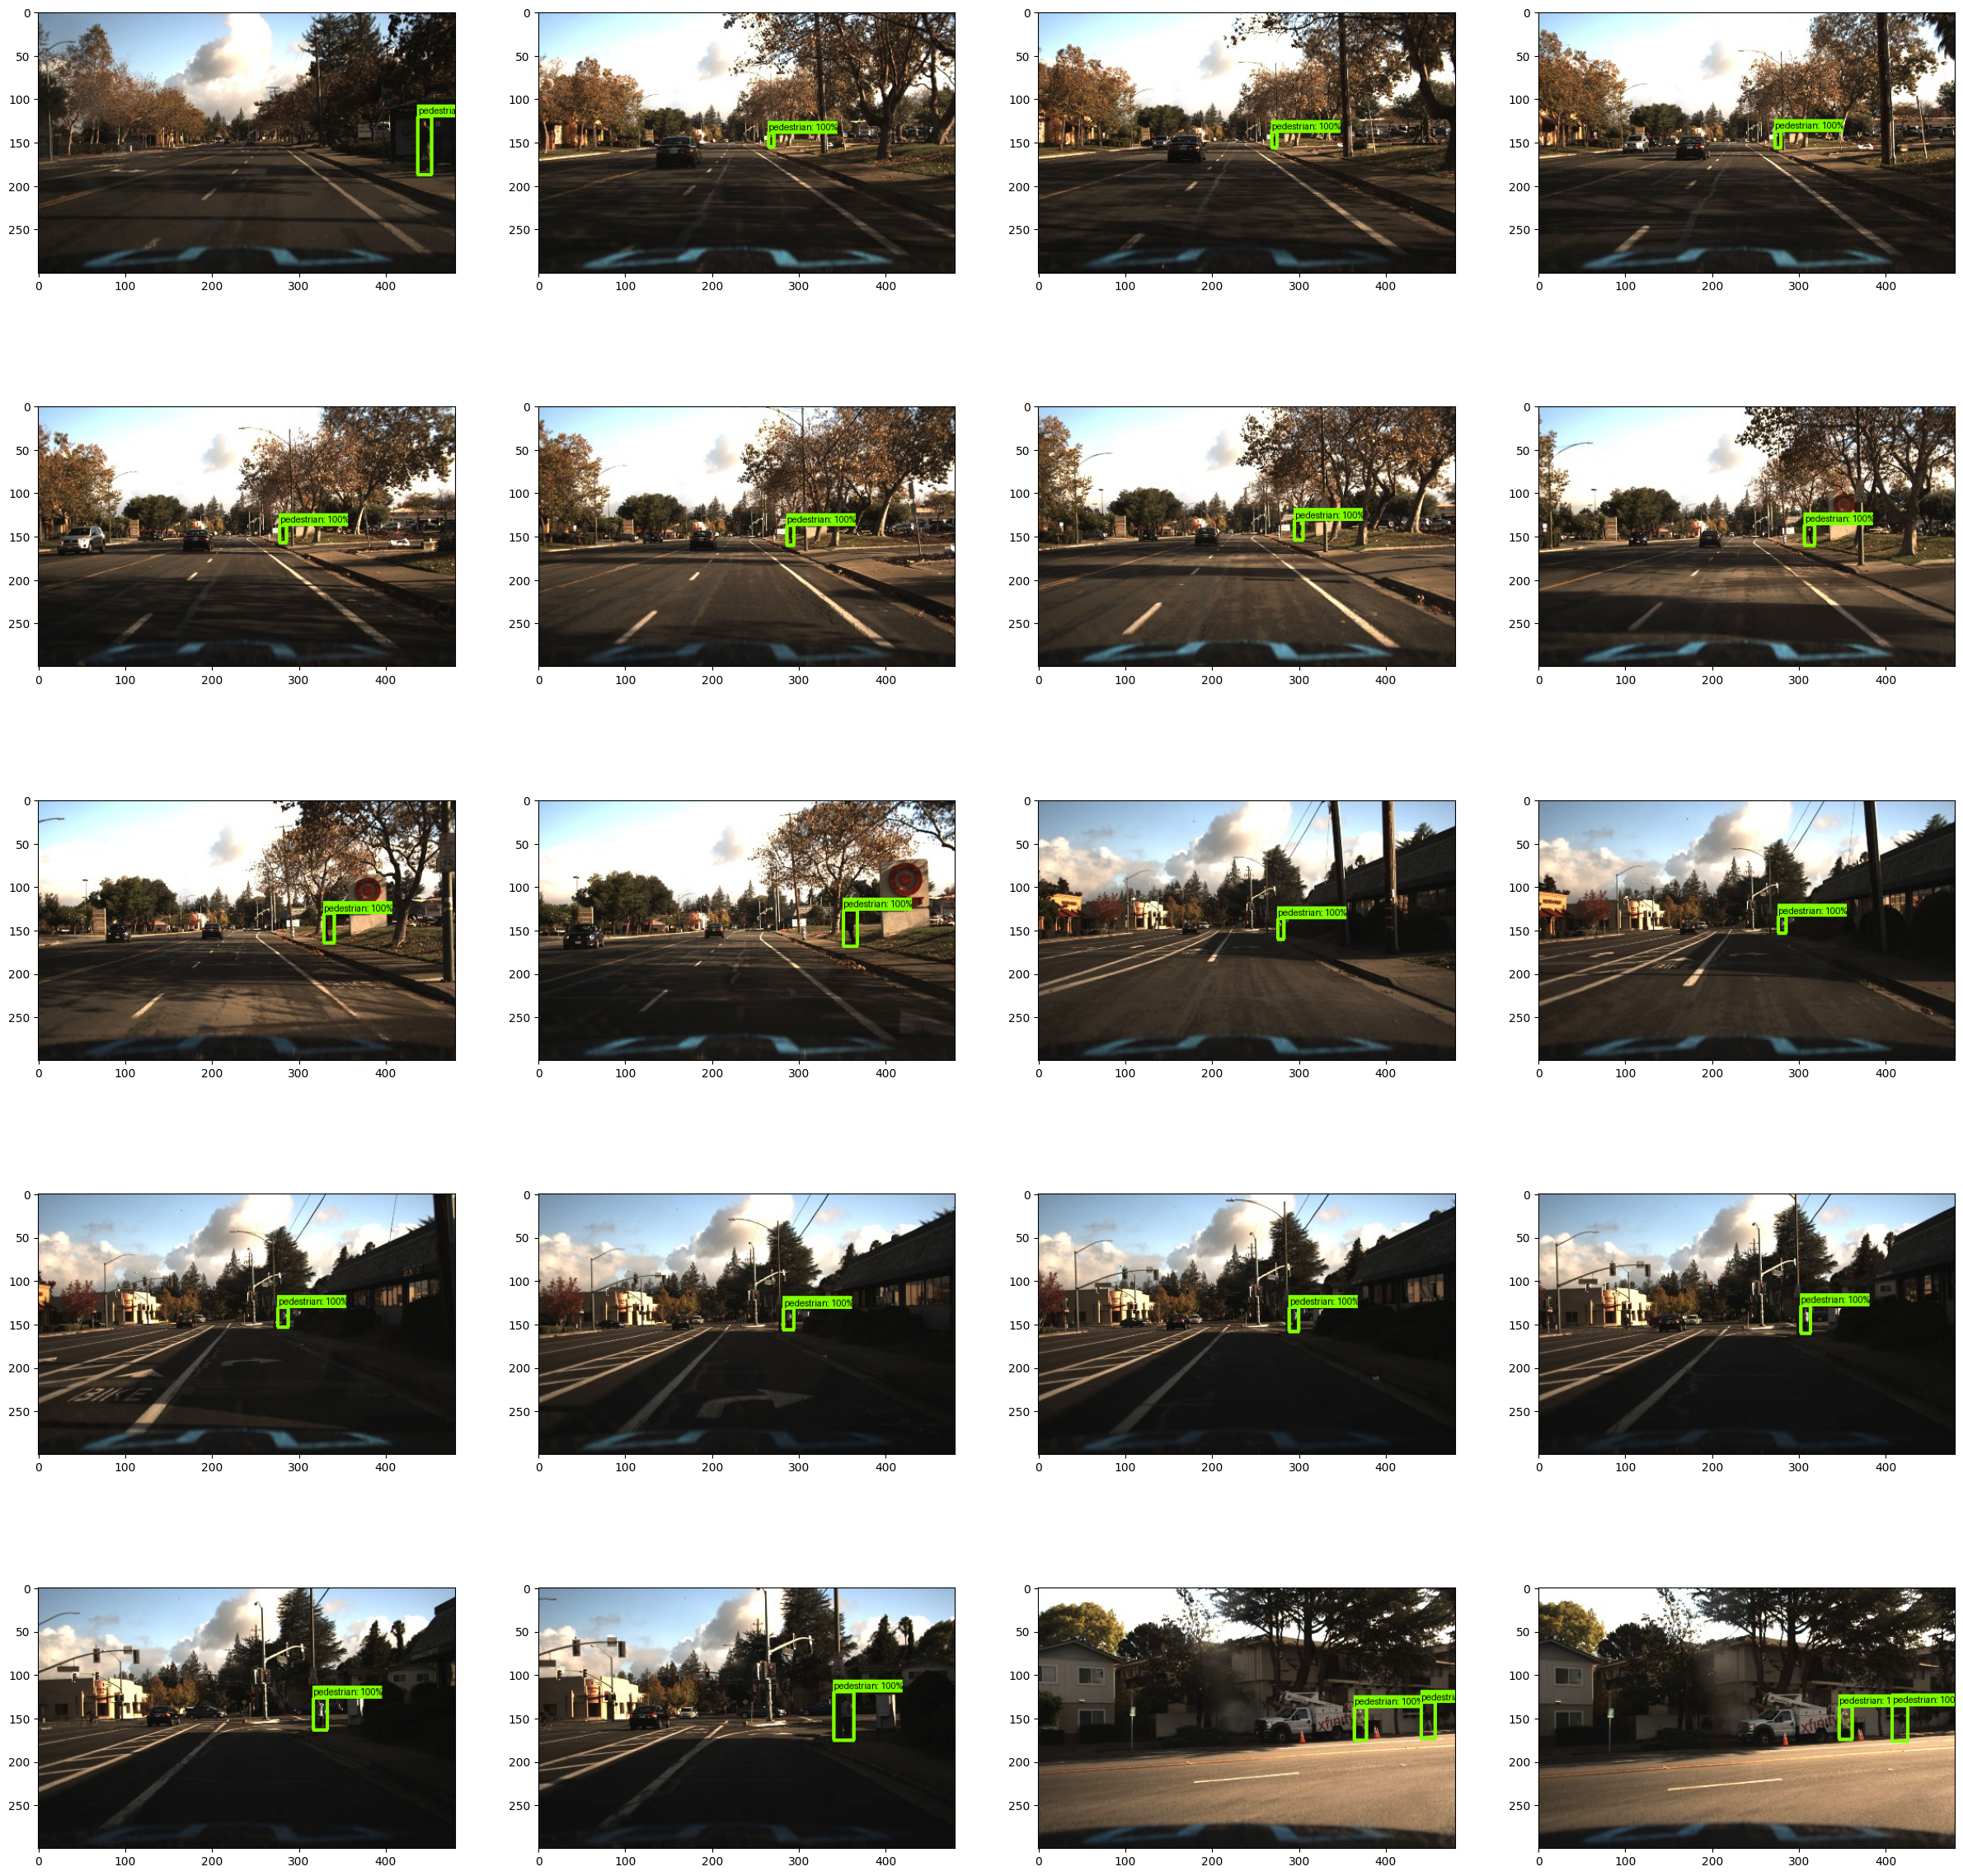

In [25]:
#Atteion to min_score_thresh, could not grapich if the error is less that min
def plot_detections(image_np, boxes, classes,  scores, category_index):
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.5
  )
  plt.imshow(image_np_with_annotations)

plt.figure(figsize=(30,30))
#First 20 apparences
for idx in range(0,20):
  bboxes = list(gt_boxes.values())[idx]
  dummy_score = np.ones(shape=[bboxes.shape[0]], dtype=np.float32)
  plt.subplot(5,4,idx+1)
  plot_detections(
      train_images_np[idx],
      bboxes,
      np.ones(shape=[bboxes.shape[0]], dtype=np.int32),
      dummy_score,
      category_index
      )

plt.show()